In [2]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1. Load the dataset
# Credits:  California Cooperative Oceanic Fisheries Investigations
# URL: https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv
# Drescription: The CalCOFI data set represents the longest (1949-present) 
# and most complete (more than 50,000 sampling stations) time series of 
# oceanographic and larval fish data in the world. It includes abundance 
# data on the larvae of over 250 species of fish; larval length frequency 
# data and egg abundance data on key commercial species; and oceanographic 
# and plankton data. The physical, chemical, and biological data collected 
# at regular time and space intervals quickly became valuable for 
# documenting climatic cycles in the California Current and a range of 
# biological responses to them. 
#df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv')
df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv',index_col=0)

In [9]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [15]:
# 1.2 Take a sample
df_raw.sample(10)

Salnty  T_degC
104  33.431   10.45
23   33.806    7.98
102  33.159   12.64
129  33.600    8.37
120  34.250    3.52
236  33.400   11.77
295  33.170   12.50
12   33.833    7.50
228  33.860    8.71
279  32.900   11.36

In [18]:
# 1.3 Transform if needed
# variables caterogical y fecha
# esa transformación afecta a todo el dataset (antes de dividirlo)

In [20]:
# Step 2. Make a basic EDA

#hacemos una copia del DF original
df = df_raw.copy()

In [22]:
# 2.1 Split the dataset so to avoid bias
X=df['Salnty']
y=df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40) #el size predeterminaod es 75/25
#X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.30 random_state=40) #ejemplo con 70/30

In [23]:
# 2.2 Join the train sets to ease insights
df_train = pd.DataFrame({'Salinity':X_train,'Temperature': y_train})


In [24]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 243 to 219
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salinity     225 non-null    float64
 1   Temperature  225 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


In [25]:
# 2.4 Take a sample
df_train.sample(10)

Salinity  Temperature
48     33.240         9.06
35     33.533         8.60
246    33.212        12.66
209    33.980         6.68
228    33.860         8.71
95     33.147        10.21
286    34.086         4.38
36     32.983        11.13
4      34.400         3.39
104    33.431        10.45

In [26]:
# 2.5 Describe the numerical and date variables
df_train.describe()

Salinity  Temperature
count  225.000000   225.000000
mean    33.605831     7.937244
std      0.559792     2.996976
min     32.630000     2.780000
25%     33.000000     5.020000
50%     33.800000     8.180000
75%     34.101000    10.470000
max     34.430000    12.660000

In [29]:
# 2.6 Describe the categorical variables
#utilizar value_counts() en caso de tener variables categóricas
#para hacer el histograma, debemos cambiar las categorical a numérico

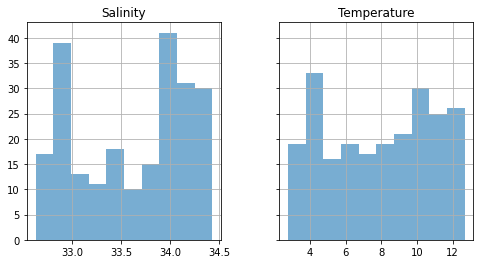

In [28]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize=(8,4),sharey=True, alpha=0.6)
plt.show()

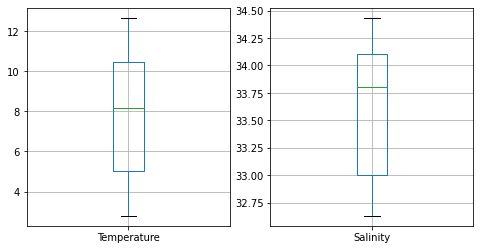

In [31]:
# 2.8 Perform univariate analysis - boxplots
fig,ax = plt.subplots(1,2,figsize=(8,4))
df_train[['Temperature']].boxplot(ax=ax[0])
df_train[['Salinity']].boxplot(ax=ax[1])
plt.show()

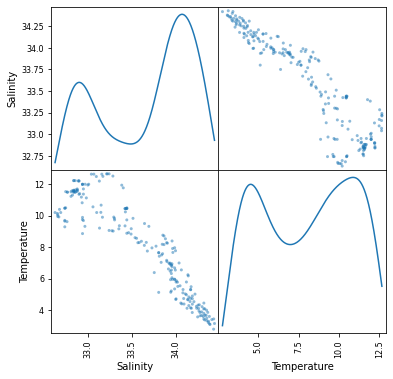

In [33]:
# 2.9 Perform bivariate analysis - scatter matrix
pd.plotting.scatter_matrix(df_train,diagonal='kde',figsize=(6,6))
plt.show()

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
#este caso no tiene variables que no estén co-relacionadas, solo tengo 1 variable

In [ ]:
# 2.11 Perform multivariate analysis - VIF
# no lo hacemos porque tenemos solo 1 variable

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals
# goal - pronosticar en base a las variables
#utilizo los modelos que corresponda. Hay que ir escribiendo el objetivo y cómo se hará

El objetivo es pronosticar la Temperatura respecto a la Salinidad

In [34]:
# 3.1 Perform model fit - A
sklm = LinearRegression()
#cuando solo es 1 variable predictora, skLearn no lo interpreta como una columna, hay que ponerle .to_frame, con 2 o + no se necesita.
sklm.fit(X_train.to_frame(),y_train)
score = sklm.score(X_train.to_frame(), y_train)
# score R^2 :^proportion if the variance in DV explained by IV
print(f'The Score is {score: .4f}')

The Score is  0.8454


In [36]:
# se corre en dataset de pruebas
predictions = sklm.predict(X_test.to_frame()) # to_frame porque es 1 variable sola
print(f'The R^2 is {r2_score(y_test,predictions)}')
#RMSE: Root mean squared error
print(f'The RMSE is {mean_squared_error(y_test,predictions, squared=False)}')

The R^2 is 0.7863151702808187
The RMSE is 1.316206920253402


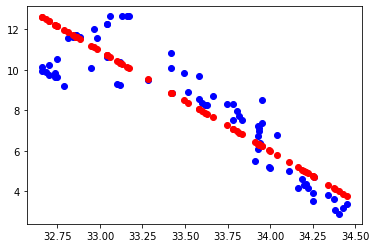

In [37]:
plt.scatter(x=X_test,y=y_test,color='Blue')
plt.scatter(x=X_test,y=predictions,color='Red')
plt.show()

In [39]:
# 3.2 Perform model fit - B
# Lo hacemos de otra manera
results = smf.ols('Temperature ~ Salinity', data=df_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-92
Time:                        22:18:00   Log-Likelihood:                -355.70
No. Observations:                 225   AIC:                             715.4
Df Residuals:                     223   BIC:                             722.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.3618      4.738     36.590      0.0

In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [41]:
# Step 4. Write up your conclusions

# Poner las conclusiones y recomendaciones
# Hemos utilizado los siguientes pasos para calcular
# Hemos tomado la decisión de quitar valores
# Vemos que no se asemeja a la realidad 
# Este modelo puede ajustarse a los valores reales con TAL resultado
